<a href="https://colab.research.google.com/github/samiHEL/ML_Intro_Regression/blob/main/ML_Intro_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Connexion drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Exemple prévision salariale
import numpy as np
X=np.array([0,3,6,8])
Y=np.array([35,45,65,80])

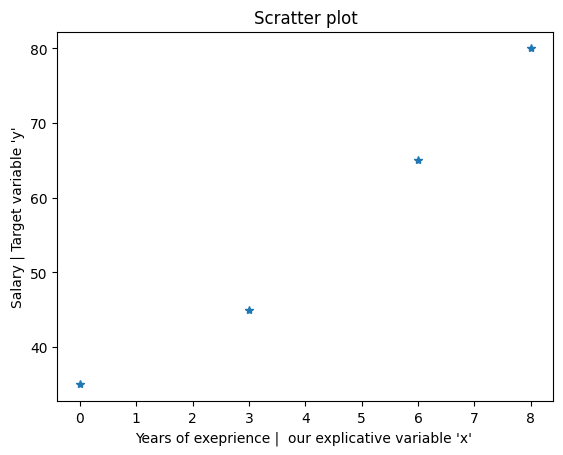

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Scratter plot")
plt.savefig("./intuitive_scatter.png")

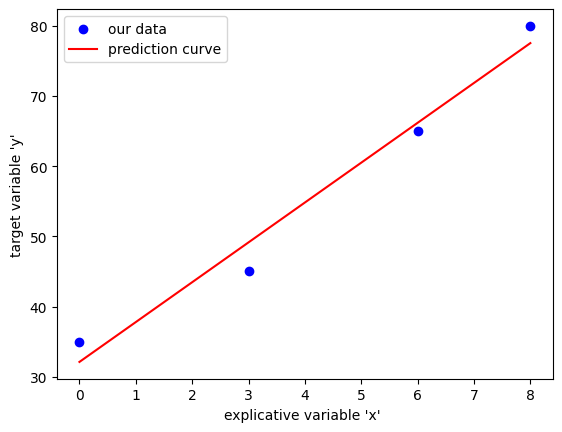

In [ ]:
# Creation date de prediction
def reg_plot(x,y,m):
    plt.scatter(x,y,c='blue',label="our data")
    plt.plot(x, m.predict(x.reshape(-1, 1)), color='red',label="prediction curve")
    plt.xlabel("explicative variable 'x' ")
    plt.ylabel("target variable 'y'")
    plt.legend()
    return None


from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1),Y)
reg_plot(X,Y,linear_model)
plt.savefig("./approche_intuitive.png")



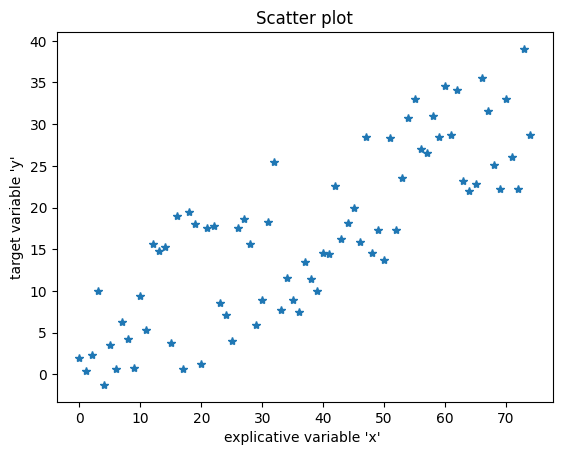

In [ ]:
#Autre exemple avec  numpy en utilisant arange() et random.uniform()
import numpy as np
x=np.arange(75)
delta = np.random.uniform(-10,10, size=(75,))
y = 0.4 * x +3 + delta


plt.plot(x,y,"*")
plt.xlabel("explicative variable 'x' ")
plt.ylabel("target variable 'y'")
plt.title("Scatter plot")
plt.savefig("./intuitive_scatter_bis.png")



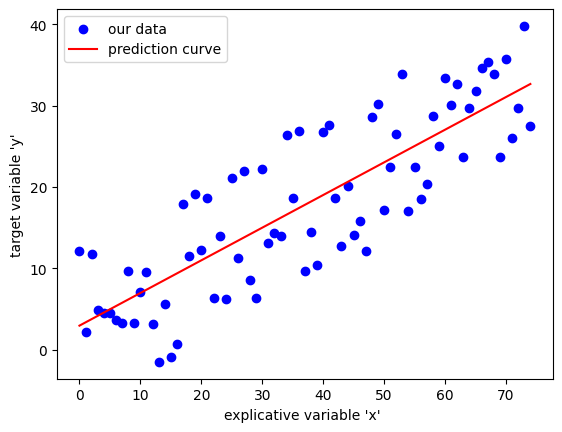

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#we are using the reshape function to convert the 1D array to a 2D array which is an obligation in scikit-learn LinearRegression() cf official doc
linear_model.fit(x.reshape(-1, 1),y)
reg_plot(x,y,linear_model)
plt.savefig("./prediction.png")




In [ ]:
import pandas as pd
#df = pd.read_csv("../data/Salary_Data.csv", sep=',')
df = pd.read_csv(r'/content/drive/MyDrive/Salary_Data.csv', sep=",")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0.5, 1.0, 'Years of experience vs Salary')

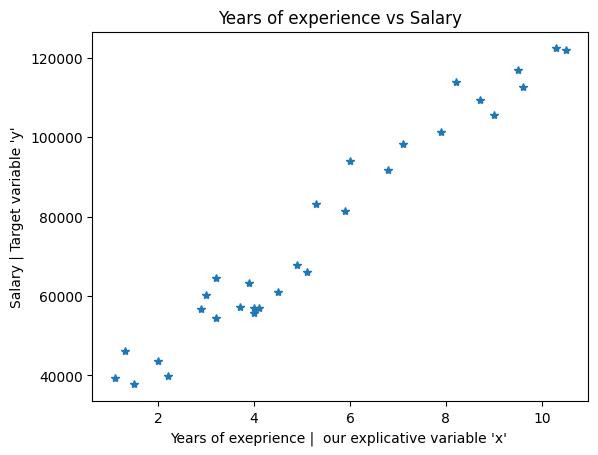

In [ ]:
df=df[["YearsExperience","Salary"]]
X=df.YearsExperience
Y=df.Salary
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Years of experience vs Salary")


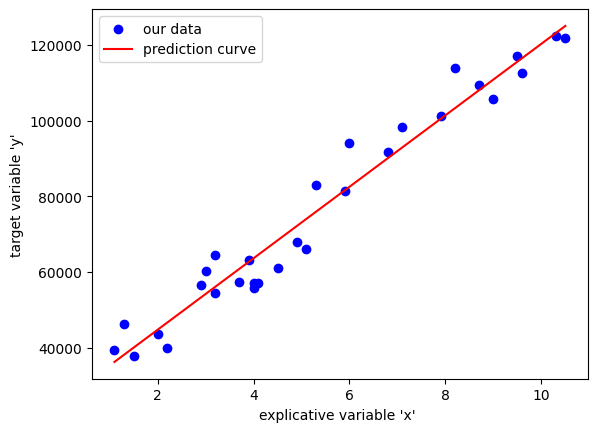

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(np.array(X).reshape(-1, 1),np.array(Y))
reg_plot(np.array(X),np.array(Y),linear_model)


**Regression Multiple**

In [51]:
#importer vos librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation
# Info prix pour chambre -> id -> price_availability.csv
# Info general chambre -> id - > listings_final.csv
prices = pd.read_csv(r'/content/drive/MyDrive/price_availability.csv', sep=";")
listings = pd.read_csv(r'/content/drive/MyDrive/listings_final.csv', sep=";")
#attention l'individu 589 n'a pas de prix !!
listings = listings.drop(589)



listings.head()
#prices.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


***Liaison des deux Datasets par rapport à listing_id***

In [37]:
#define our input variable X and output variable Y
X = listings.loc[:, ["listing_id", "person_capacity", "bedrooms", "bathrooms" ]]
#print(X)
Y = []

#build the price vector
for i, row in X.iterrows():
    y = 0
    #Liaison id des deux datasets
    ID = int(row["listing_id"])
    subset = prices[prices["listing_id"] == ID]
    y = subset["local_price"].mean()
    #print(y)
    Y.append(y)

#convert into numpy array
Y = np.asarray(Y)
print(Y[:20])



[ 45.94845361  44.47368421  49.         165.          69.77443609
  80.56363636  61.10909091 213.32460733 174.02849741 169.
 183.0848329  297.76315789 170.          49.95275591  71.13740458
 160.         409.54887218  35.06887755  62.13533835 107.37402597]


In [38]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((699, 4), (699,), (300, 4), (300,))

***Methode d'entrainement***

In [40]:

#entraîner le modèle de régression linéaire.
#X_train.values représente les caractéristiques (ou variables indépendantes) de l'ensemble d'entraînement
#y_train représente la variable cible (ou variable dépendante).
regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train)


#what do you think about the results ?
print('Coefficients beta_j : \n', regr.coef_)
print('Coefficients INTERCEPT beta_0 : \n', regr.intercept_)
#Coefficient négatif donc relation négative entre X_train et y_train.Lorsque X_train augmente y_train diminue

Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672868


In [50]:
X_test

,listing_id,person_capacity,bedrooms,bathrooms
453,14992207,2,1,1.0
794,24564156,2,1,1.0
209,3452604,2,0,1.0
309,8243908,1,1,1.0
741,23233753,5,2,1.0
...,...,...,...,...
314,8525469,8,3,2.5
404,12976143,7,3,2.0
7,5662637,2,1,1.0
155,2158913,2,0,1.0


In [49]:
y_test[:100]

array([ 79.81038961, 125.        ,  95.45333333,  29.        ,
        82.5883905 , 123.63829787, 360.        , 130.        ,
       450.        , 164.845953  ,  68.35142119, 294.18181818,
        68.08247423,  51.01595745, 170.30548303,  80.24479167,
        73.78249337, 195.        , 375.0268714 , 834.96124031,
       850.65633075,  89.        , 650.        ,  63.38219895,
        83.        , 190.        , 202.23514212,  96.6056701 ,
       108.95026178,  50.        ,  28.31937173, 195.        ,
        93.70234987, 474.14258189, 450.        , 517.0984456 ,
        83.37730871, 395.        ,  79.        , 129.17493473,
       135.11227154,  51.52785146, 117.22572178, 260.        ,
       618.        ,  42.        , 180.        , 160.        ,
       179.67315175,  40.0025641 ,  80.984375  , 116.09947644,
       429.28645833,  76.06896552, 219.5037594 , 459.71391076,
       183.0848329 , 204.39276486, 161.5503876 , 131.        ,
        44.16569201, 156.19693095, 288.68421053, 219.08

In [ ]:
#y = ax1 + bx2 + cx3 ...
#calculer le coef directeur pour chaque facteur